# Quest for Upstreams

An oil company, OilyGiant is in a quest of finding a new location for its new oil mining location.

A dataset of volume oil reserves, as well as three independent variables for each oil well as observed in the past are given.

The project is to find one location with to develop with prospect to meet company's business metrics:

1. Contribute to the company's positive profitability, with budgested cost of USD 100,000,000

2. Has a potential of risk not more than 2.5%

Steps in finding that are:

1. Gather the parameters to select wells in each location: oil quality and volume of reserves

2. Build and select a model that is able to predict the volume of oil reserve in a new well

3. Select wells with highest estimated volume

4. Select location with highest total profit for the selected wells

The datasets of three locations observe:

1. id — unique ID of wells

2. f0, f1, f2 — three features that are significant

3. product — volume of oil reserves in a well (thousands barrel)


The parameters of each well are known already. 

The target of this machine learing is to find prediction of volume, that is numerical, continuous.

Hence the model needed is the regression one.

One location with the highest margin will be found.

From those three location, wells are to be sampled using bootstrapping method.
And an analysis of profitability and potential risk is made.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# save dataset 0 as df_1 for Location 1
df_1 = pd.read_csv('/content/gdrive/MyDrive/data_projects/geo_data_0.csv')

# save dataset 1 as df_2 for Location 2
df_2 = pd.read_csv('/content/gdrive/MyDrive/data_projects/geo_data_1.csv')

# save dataset 2 as df_3 for Location 3
df_3 = pd.read_csv('/content/gdrive/MyDrive/data_projects/geo_data_2.csv')

## Pre-processing

In [ ]:
# sample dataset Location 1
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
# sample dataset Location 2
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
# sample dataset Location 3
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
# general info of location 1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# general info of location 2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# general info of location 3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
# general info of location 1
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
# general info of location 2
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
# general info of location 3
df_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [ ]:
# check duplicates in location 1
df_1.duplicated().sum()

0

In [ ]:
# check duplicates in location 2
df_2.duplicated().sum()

0

In [ ]:
# check duplicates in location 3
df_3.duplicated().sum()

0

In [ ]:
# check duplicates of oil well in location 1
df_1.id.duplicated().sum()

10

In [ ]:
# check duplicated oil well in location 1
df_1.loc[df_1.id.duplicated(keep=False)].reset_index()

,index,id,f0,f1,f2,product
0,931,HZww2,0.755284,0.368511,1.863211,30.681774
1,1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
2,1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3,3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
4,7530,HZww2,1.061194,-0.373969,10.430210,158.828695
5,16633,fiKDv,0.157341,1.028359,5.585586,95.817889
6,21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
7,41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
8,42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
9,51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


In [ ]:
# check duplicates of oil well in location 2
df_2.id.duplicated().sum()

4

In [ ]:
# check duplicates of oil well in location 2
df_3.id.duplicated().sum()

4

### Interim Conclusions

There is no missing values. The data types are correct. 

There is a duplicate in ID of oil well in each of the three datasets, however each duplicate differs on their predictors and targets.

Although the product's means of Location 1 and 3 are similar, and are higher that of Location 2, the standard deviations of Location 1 and 3 are similar with that of Location 2. This might show data of Location 2 as more dispersed than of other locations.

## Exploratory Data Analysis

In this step, correlation and distribution are analysed and visualised.

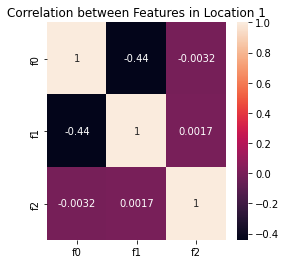

In [ ]:
#Check for any strong correlation in variables with potential to be correlated in Location 1
related_variables = df_1[['f0', 'f1', 'f2']]

plt.figure(figsize=(4,4))
plt.title('Correlation between Features in Location 1')
sns.heatmap(related_variables.corr(),annot=True)
plt.show()

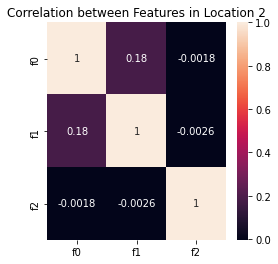

In [ ]:
#Check for any strong correlation in variables with potential to be correlated Location 2
related_variables = df_2[['f0', 'f1', 'f2']]

plt.figure(figsize=(4,4))
plt.title('Correlation between Features in Location 2')
sns.heatmap(related_variables.corr(),annot=True)
plt.show()

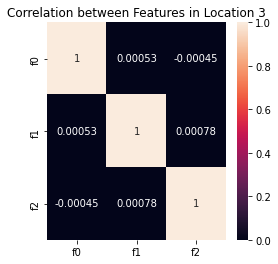

In [ ]:
#Check for any strong correlation in variables with potential to be correlated
related_variables = df_3[['f0', 'f1', 'f2']]

plt.figure(figsize=(4,4))
plt.title('Correlation between Features in Location 3')
sns.heatmap(related_variables.corr(),annot=True)
plt.show()

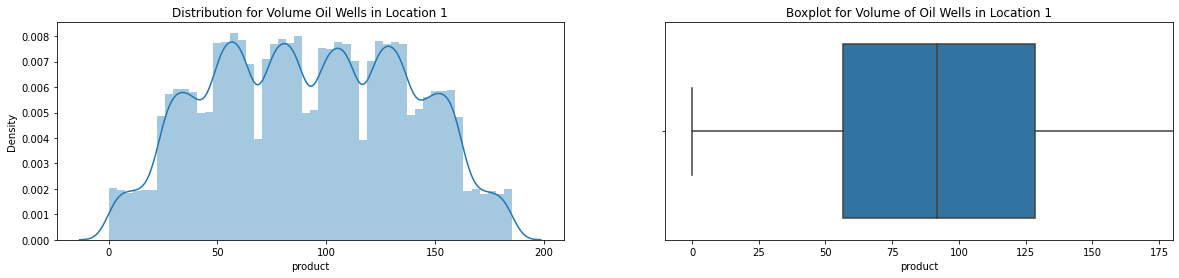

In [ ]:
# Univariate analysis target - Location 1
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df_1['product'])
plt.title('Distribution for Volume Oil Wells in Location 1')

f.add_subplot(1,2,2)
plt.xlim(-10,180)
sns.boxplot(df_1['product'])
plt.title('Boxplot for Volume of Oil Wells in Location 1')
plt.show()

Text(0.5, 1.0, 'Distribution for Features f2 in Location 1')

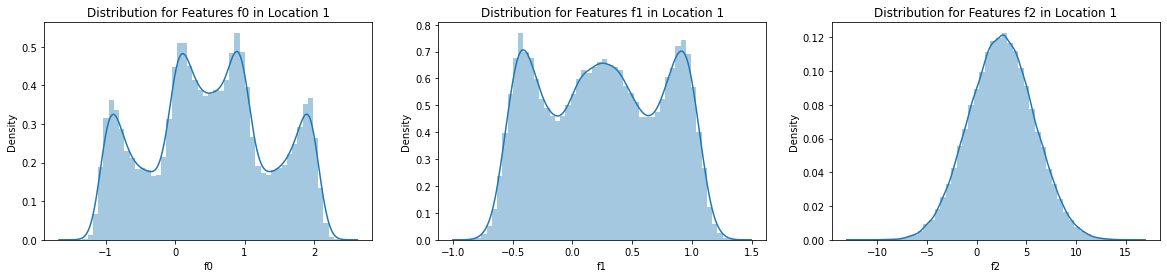

In [ ]:
# Univariate analysis target - Location 1

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.distplot(df_1['f0'])
plt.title('Distribution for Features f0 in Location 1')

f.add_subplot(1,3,2)
sns.distplot(df_1['f1'])
plt.title('Distribution for Features f1 in Location 1')

f.add_subplot(1,3,3)
sns.distplot(df_1['f2'])
plt.title('Distribution for Features f2 in Location 1')

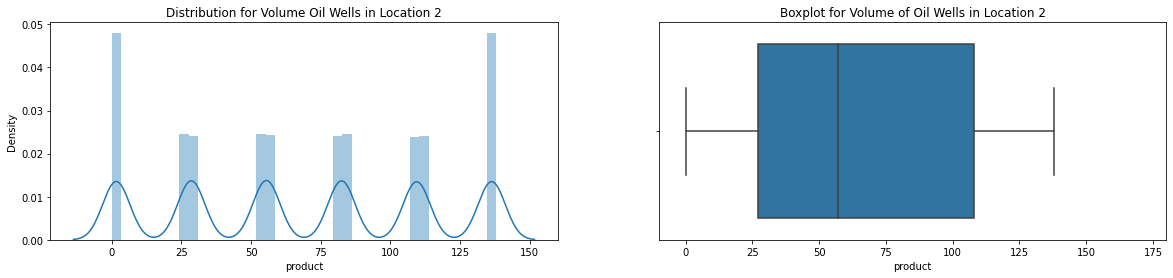

In [ ]:
# Univariate analysis target - Location 2
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df_2['product'])
plt.title('Distribution for Volume Oil Wells in Location 2')

f.add_subplot(1,2,2)
plt.xlim(-10,180)
sns.boxplot(df_2['product'])
plt.title('Boxplot for Volume of Oil Wells in Location 2')
plt.show()

Text(0.5, 1.0, 'Distribution for Features f2 in Location 2')

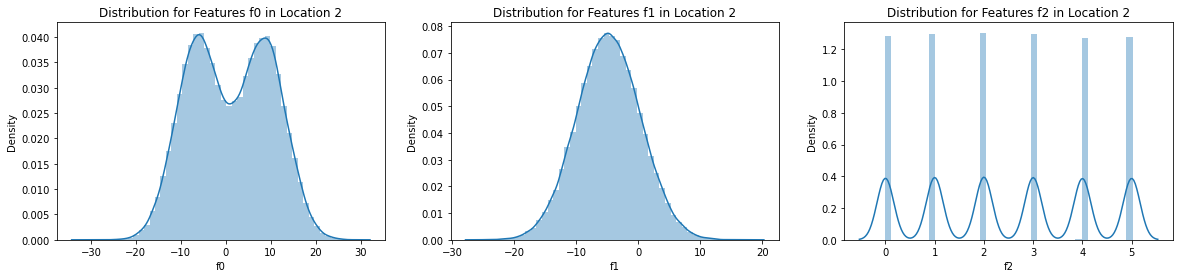

In [ ]:
# Univariate analysis target - Location 2

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.distplot(df_2['f0'])
plt.title('Distribution for Features f0 in Location 2')

f.add_subplot(1,3,2)
sns.distplot(df_2['f1'])
plt.title('Distribution for Features f1 in Location 2')

f.add_subplot(1,3,3)
sns.distplot(df_2['f2'])
plt.title('Distribution for Features f2 in Location 2')

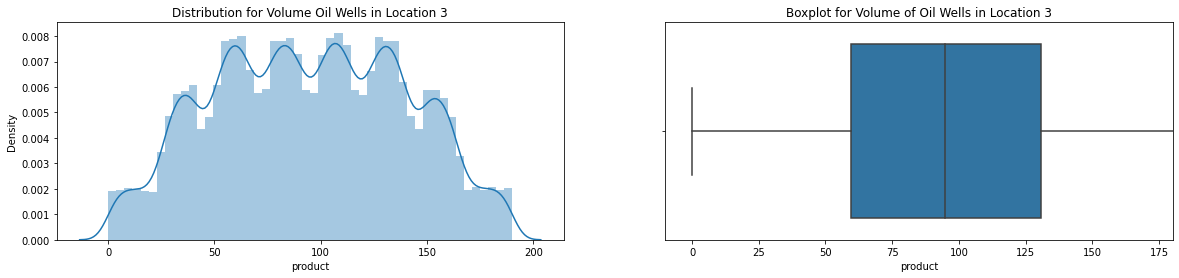

In [ ]:
# Univariate analysis target - Location 3
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df_3['product'])
plt.title('Distribution for Volume Oil Wells in Location 3')

f.add_subplot(1,2,2)
plt.xlim(-10,180)
sns.boxplot(df_3['product'])
plt.title('Boxplot for Volume of Oil Wells in Location 3')
plt.show()

Text(0.5, 1.0, 'Distribution for Features f2 in Location 3')

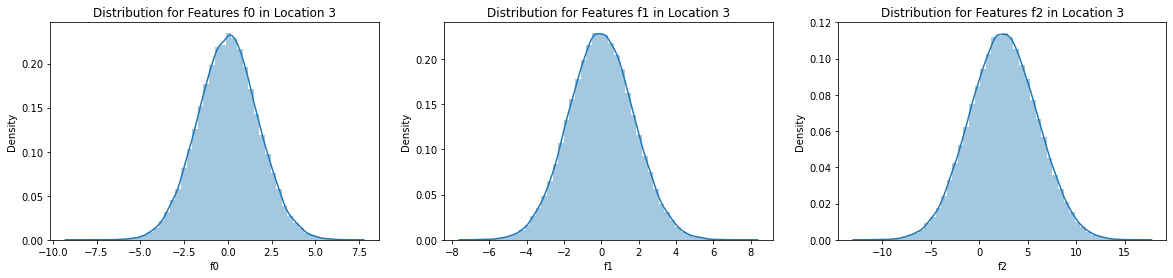

In [ ]:
# Univariate analysis target - Location 3

f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.distplot(df_3['f0'])
plt.title('Distribution for Features f0 in Location 3')

f.add_subplot(1,3,2)
sns.distplot(df_3['f1'])
plt.title('Distribution for Features f1 in Location 3')

f.add_subplot(1,3,3)
sns.distplot(df_3['f2'])
plt.title('Distribution for Features f2 in Location 3')

### Interim Conclusions

Targets are dispersed in between 0 to 200 in Location 1 and 3. And 0 to 150 in Location 2.

There is no strong correlation between independent variables in all three datasets.

Some other interesting informations from visualisation are:

1. Distributions of targets in Location 1 and 3 are similar.

2. There's similiarity in distributions of target and feature f2 in Location 2. Such similarity is not found with other features, nor in any other Locations.

## Train-test split

In this step each dataset is splitted to train and test, with test proportion of 25%.

In [ ]:
# select only relevant variables for features
df_1_x = df_1.drop(['id','product'], axis=1)
df_1_x.head()

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


In [ ]:
# select only relevant variables for features
df_2_x = df_2.drop(['id','product'], axis=1)
df_2_x.head()

,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363


In [ ]:
# select only relevant variables for features
df_3_x = df_1.drop(['id','product'], axis=1)
df_3_x.head()

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


In [ ]:
# dataset for target
df_1_y = df_1['product']
df_1_y.head()

0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [ ]:
# dataset for target
df_2_y = df_2['product']
df_2_y.head()

0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64

In [ ]:
# dataset for target
df_3_y = df_3['product']
df_3_y.head()

0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    149.600746
Name: product, dtype: float64

In [ ]:
# train-test split dataset 1
# validation size of 25%
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(df_1_x, df_1_y, test_size = 0.25, random_state=123)
x_valid_1.shape

(25000, 3)

In [ ]:
# train-test split dataset 2
# validation size of 25%
x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(df_2_x, df_2_y, test_size = 0.25, random_state=123)
x_valid_2.shape

(25000, 3)

In [ ]:
# train-test split dataset 1
# validation size of 25%
x_train_3, x_valid_3, y_train_3, y_valid_3 = train_test_split(df_3_x, df_3_y, test_size = 0.25, random_state=123)
x_valid_3.shape

(25000, 3)

## XGBoost

In this step first model will be built, using XGBoost algorithm that lately is known as the best algorithm in machine learning world.

### Build models with XGBoost Algorithm

In [ ]:
# Using GridSearch to find combination of hyperparameter
gamma = range(5, 10, 1)
learning_rate = np.arange(0.4, 0.7, 0.1)

hyperparameters = dict(gamma=gamma, learning_rate=learning_rate)

#create model with grid search
xgb_1 = XGBRegressor( objective='reg:squarederror', random_state=123)

clf = GridSearchCV(xgb_1, hyperparameters, cv=5)

# train model
xgb_1 = clf.fit(x_train_1, y_train_1)
print('Best gamma:', xgb_1.best_estimator_.get_params()['gamma'])
print('Best learning_rate:', xgb_1.best_estimator_.get_params()['learning_rate'])


Best gamma: 7
Best learning_rate: 0.4


In [ ]:
# apply the hyperparam to xgb model for dataset 1
xgb_1 = XGBRegressor( objective='reg:squarederror', random_state=123, 
                     gamma=7, learning_rate=0.4)
xgb_1.fit(x_train_1, y_train_1)
predict_valid_1 = xgb_1.predict(x_valid_1)
r2_score(y_valid_1, predict_valid_1)

0.28298789958782444

In [ ]:
# apply the similar hyperparam (as benchmarking) to xgb model for dataset 2
xgb_2 = XGBRegressor( objective='reg:squarederror', random_state=123, 
                     gamma=7, learning_rate=0.4)
xgb_2.fit(x_train_2, y_train_2)
predict_valid_2 = xgb_2.predict(x_valid_2)
r2_score(y_valid_2, predict_valid_2)

0.999752529082184

In [ ]:
# find r2_score for dataset 2 using train dataset
predict_train_2 = xgb_2.predict(x_train_2)
r2_score(y_train_2, predict_train_2)

0.9997784480735951

In [ ]:
# apply the similar hyperparam (as benchmarking) to xgb model for dataset 3
xgb_3 = XGBRegressor( objective='reg:squarederror', random_state=123, 
                     gamma=7, learning_rate=0.4)
xgb_3.fit(x_train_3, y_train_3)
predict_valid_3 = xgb_3.predict(x_valid_3)
r2_score(y_valid_3, predict_valid_3)

-0.028442705358784126

### Plotting the coefficients

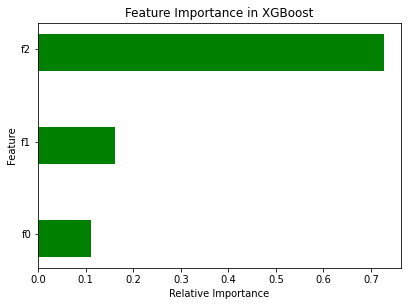

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's importance on xgb model dataset 1
y = xgb_1.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_1.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

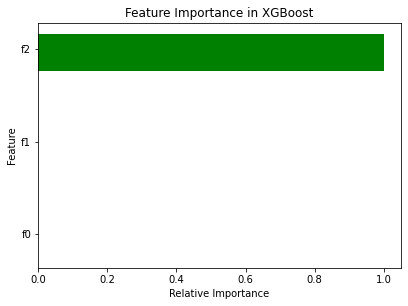

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's importance on xgb model dataset 2
y = xgb_2.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_2.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

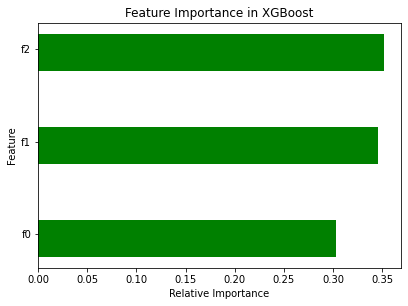

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's importance on xgb model dataset 3
y = xgb_3.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_3.columns, minor=False)
plt.title('Feature Importance in XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Evaluation by RMSE

In [ ]:
# rmse of Location 1
mse_xgb_1 = mean_squared_error(y_valid_1, predict_valid_1)
rmse_xgb_1 = mse_xgb_1**0.5
rmse_xgb_1

37.603563173739445

In [ ]:
# rmse of Location 2
mse_xgb_2 = mean_squared_error(y_valid_2, predict_valid_2)
rmse_xgb_2 = mse_xgb_2**0.5
rmse_xgb_2

0.720786688578983

In [ ]:
# rmse of Location 3
mse_xgb_3 = mean_squared_error(y_valid_3, predict_valid_3)
rmse_xgb_3 = mse_xgb_3**0.5
rmse_xgb_3

45.30413864059838

### Predictions vs targets for Location 1

In [ ]:
# save target valid Location 1
target_valid_1 = pd.DataFrame(y_valid_1).reset_index()
target_valid_1.head()

,index,product
0,42083,145.825972
1,71825,134.020212
2,99535,88.905826
3,47879,19.508226
4,36734,108.713468


In [ ]:
# save dataframe target of dataset valid Location 1
delta_xgb_1 = target_valid_1

# add column for predictions
delta_xgb_1['predict'] = pd.Series(predict_valid_1)
delta_xgb_1.head()

,index,product,predict
0,42083,145.825972,132.972809
1,71825,134.020212,88.778069
2,99535,88.905826,46.857273
3,47879,19.508226,87.723549
4,36734,108.713468,113.019241


In [ ]:
# set original index as the index
delta_xgb_1 = delta_xgb_1.set_index('index')
delta_xgb_1

,product,predict
index,,
42083,145.825972,132.972809
71825,134.020212,88.778069
99535,88.905826,46.857273
47879,19.508226,87.723549
36734,108.713468,113.019241
...,...,...
56405,80.100250,93.611244
50954,47.345664,47.240677
99121,176.382705,149.896820


In [ ]:
# add column for discrepancy predictions to actual
delta_xgb_1['var'] = delta_xgb_1['product']-delta_xgb_1['predict']
delta_xgb_1.head()

,product,predict,var
index,,,
42083,145.825972,132.972809,12.853163
71825,134.020212,88.778069,45.242143
99535,88.905826,46.857273,42.048553
47879,19.508226,87.723549,-68.215323
36734,108.713468,113.019241,-4.305773


In [ ]:
# load statistical description
delta_xgb_1.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,92.850624,92.532921,0.317708
std,44.409353,25.077299,37.602973
min,0.000000,15.608838,-119.119739
25%,56.798166,73.738487,-27.155096
50%,92.372796,92.705444,0.252241
75%,129.011163,110.867210,27.867575
max,185.355615,173.149918,124.884481


### Predictions vs targets for Location 2

In [ ]:
# save target valid Location 2
target_valid_2 = pd.DataFrame(y_valid_2).reset_index()
target_valid_2.head()

,index,product
0,42083,57.085625
1,71825,80.859783
2,99535,53.906522
3,47879,107.813044
4,36734,53.906522


In [ ]:
# save dataframe target of dataset valid Location 2
delta_xgb_2 = target_valid_2

# add column for predictions
delta_xgb_2['predict'] = pd.Series(predict_valid_2)
delta_xgb_2.head()

,index,product,predict
0,42083,57.085625,56.821075
1,71825,80.859783,80.942795
2,99535,53.906522,53.942303
3,47879,107.813044,108.088951
4,36734,53.906522,53.949478


In [ ]:
# set original index as the index
delta_xgb_2 = delta_xgb_2.set_index('index')
delta_xgb_2

,product,predict
index,,
42083,57.085625,56.821075
71825,80.859783,80.942795
99535,53.906522,53.942303
47879,107.813044,108.088951
36734,53.906522,53.949478
...,...,...
56405,30.132364,29.191818
50954,110.992147,110.943970
99121,3.179103,3.166249


In [ ]:
# add column for discrepancy predictions to actual
delta_xgb_2['var'] = delta_xgb_2['product']-delta_xgb_2['predict']
delta_xgb_2.head()

,product,predict,var
index,,,
42083,57.085625,56.821075,0.264549
71825,80.859783,80.942795,-0.083012
99535,53.906522,53.942303,-0.035781
47879,107.813044,108.088951,-0.275907
36734,53.906522,53.949478,-0.042956


In [ ]:
# load statistical description
delta_xgb_2.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,69.273712,69.275299,-0.001584
std,45.819818,45.817478,0.720799
min,0.000000,-0.405139,-3.253839
25%,30.132364,29.045277,-0.037144
50%,80.859783,80.849648,0.000046
75%,107.813044,109.246998,0.037229
max,137.945408,138.142944,3.243641


### Predictions vs targets for Location 3

In [ ]:
# save target valid Location 3
target_valid_3 = pd.DataFrame(y_valid_3).reset_index()
target_valid_3.head()

,index,product
0,42083,147.451978
1,71825,128.711794
2,99535,106.628185
3,47879,128.787131
4,36734,159.328488


In [ ]:
# save dataframe target of dataset valid Location 3
delta_xgb_3 = target_valid_3

# add column for predictions
delta_xgb_3['predict'] = pd.Series(predict_valid_3)
delta_xgb_3.head()

,index,product,predict
0,42083,147.451978,95.434799
1,71825,128.711794,95.024704
2,99535,106.628185,92.522774
3,47879,128.787131,91.917236
4,36734,159.328488,94.946274


In [ ]:
# set original index as the index
delta_xgb_3 = delta_xgb_3.set_index('index')
delta_xgb_3

,product,predict
index,,
42083,147.451978,95.434799
71825,128.711794,95.024704
99535,106.628185,92.522774
47879,128.787131,91.917236
36734,159.328488,94.946274
...,...,...
56405,114.783531,95.529266
50954,48.814291,81.277550
99121,152.196856,106.501190


In [ ]:
# add column for discrepancy predictions to actual
delta_xgb_3['var'] = delta_xgb_3['product']-delta_xgb_3['predict']
delta_xgb_3.head()

,product,predict,var
index,,,
42083,147.451978,95.434799,52.017179
71825,128.711794,95.024704,33.687090
99535,106.628185,92.522774,14.105411
47879,128.787131,91.917236,36.869895
36734,159.328488,94.946274,64.382214


In [ ]:
# load statistical description
delta_xgb_3.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,94.873488,95.062408,-0.188928
std,44.674172,7.254315,45.304651
min,0.009204,30.165722,-128.692180
25%,59.427249,92.857744,-35.474833
50%,94.682593,95.028088,-0.180541
75%,130.407800,97.226650,35.523637
max,190.010982,160.532028,124.521087


### Interim Conclusions

Mean and RMSE of predicted volume of oil reserves are:

- Location 1: 93 and 38, respectively

- Location 2: 81 and 0.7, respectively

- Location 3: 95 and 45, respectively

Although the targets and predictions of dataset of Location 1 and Location 3 have similar means and medians, their standard deviations differ significantly. And the fact that the minimum value in their discrepancies is significantly negative, it shows that the model which are trained with features f0, f1, and f2 is not a well performing model for each of those two datasets.

In addition to that, R2 score for model of Location 1 is as low as 0.3. And it is even negative for model of Location 3.
That means the model does not predict better than the mean of the target values.

On the contrary, targets and predictions of dataset of Location 2 have similar means and medians, standard deviations, even quartiles. And R2 score is as high as 0.9. It shows that the model which are trained with features f0, f1, and f2 performs well for Location 2.


## Linear Regression

Previously, XGBoost algorithm is used to build models. The performance is satisfactory for Location 2, but such is not the case for Location 1 and Location 3. In the next steps, another models will be tried, using the Linear Regression algorithm.

### Build models with Linear Regression Algorithm

In [ ]:
# load model
LR = LinearRegression()

In [ ]:
# train model and predict for Location 1
LR1 = LR.fit(x_train_1, y_train_1)
predict_lr_1 = LR1.predict(x_valid_1)
r2_score(y_valid_1, predict_lr_1)

0.2812975228159569

In [ ]:
# train model and predict for Location 2
LR2 = LR.fit(x_train_2, y_train_2)
predict_lr_2 = LR2.predict(x_valid_2)
r2_score(y_valid_2, predict_lr_2)

0.9996180923165817

In [ ]:
# train model and predict for Location 3
LR3 = LR.fit(x_train_3, y_train_3)
predict_lr_3 = LR2.predict(x_valid_3)
r2_score(y_valid_3, predict_lr_3)

-9.194377655430408e-05

### Plotting the coefficients

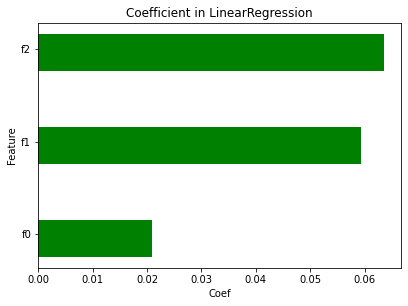

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LinearRegression model dataset 1
y = LR1.coef_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_1.columns, minor=False)
plt.title('Coefficient in LinearRegression')
plt.xlabel('Coef')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

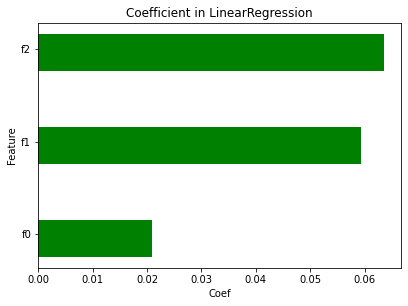

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LinearRegression model dataset 2
y = LR2.coef_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_2.columns, minor=False)
plt.title('Coefficient in LinearRegression')
plt.xlabel('Coef')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

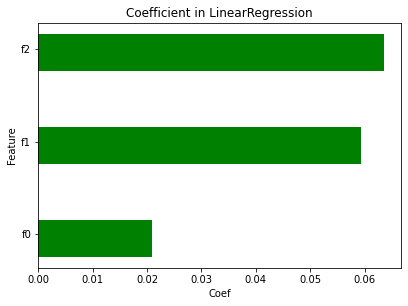

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LinearRegression model dataset 2
y = LR3.coef_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_3.columns, minor=False)
plt.title('Coefficient in LinearRegression')
plt.xlabel('Coef')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Evaluation by RMSE

In [ ]:
# rmse of Location 1
mse_lr_1 = mean_squared_error(y_valid_1, predict_lr_1)
rmse_lr_1 = mse_lr_1**0.5
rmse_lr_1

37.64786282376176

In [ ]:
# rmse of Location 2
mse_lr_2 = mean_squared_error(y_valid_2, predict_lr_2)
rmse_lr_2 = mse_lr_2**0.5
rmse_lr_2

0.8954139804944313

In [ ]:
# rmse of Location 3
mse_lr_3 = mean_squared_error(y_valid_3, predict_lr_3)
rmse_lr_3 = mse_lr_3**0.5
rmse_lr_3

44.675332248377046

### Predictions vs targets for Location 1

In [ ]:
# save dataframe target of dataset valid Location 1
delta_lr_1 = target_valid_1

# add column for predictions
delta_lr_1['predict'] = pd.Series(predict_lr_1)
delta_lr_1.head()

,index,product,predict
0,42083,145.825972,123.284256
1,71825,134.020212,75.838240
2,99535,88.905826,55.526760
3,47879,19.508226,86.673045
4,36734,108.713468,109.909327


In [ ]:
# set original index as the index
delta_lr_1 = delta_lr_1.set_index('index')
delta_lr_1

,product,predict
index,,
42083,145.825972,123.284256
71825,134.020212,75.838240
99535,88.905826,55.526760
47879,19.508226,86.673045
36734,108.713468,109.909327
...,...,...
56405,80.100250,89.708779
50954,47.345664,55.672078
99121,176.382705,139.042911


In [ ]:
# add column for discrepancy predictions to actual
delta_lr_1['var'] = delta_lr_1['product']-delta_lr_1['predict']
delta_lr_1.head()

,product,predict,var
index,,,
42083,145.825972,123.284256,22.541716
71825,134.020212,75.838240,58.181971
99535,88.905826,55.526760,33.379067
47879,19.508226,86.673045,-67.164819
36734,108.713468,109.909327,-1.195859


In [ ]:
# load statistical description
delta_lr_1.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,92.850624,92.549362,0.301262
std,44.409353,23.417413,37.647410
min,0.000000,-9.834307,-119.250502
25%,56.798166,76.555717,-27.302916
50%,92.372796,92.687630,-0.112553
75%,129.011163,108.463616,28.049328
max,185.355615,180.192010,126.967065


### Predictions vs targets for Location 2

In [ ]:
# save dataframe target of dataset valid Location 2
delta_lr_2 = target_valid_2

# add column for predictions
delta_lr_2['predict'] = pd.Series(predict_lr_2)
delta_lr_2.head()

,index,product,predict
0,42083,57.085625,56.056314
1,71825,80.859783,81.589811
2,99535,53.906522,54.461926
3,47879,107.813044,108.660979
4,36734,53.906522,54.479416


In [ ]:
# set original index as the index
delta_lr_2 = delta_lr_2.set_index('index')
delta_lr_2

,product,predict
index,,
42083,57.085625,56.056314
71825,80.859783,81.589811
99535,53.906522,54.461926
47879,107.813044,108.660979
36734,53.906522,54.479416
...,...,...
56405,30.132364,28.805734
50954,110.992147,110.025164
99121,3.179103,3.278982


In [ ]:
# add column for discrepancy predictions to actual
delta_lr_2['var'] = delta_lr_2['product']-delta_lr_2['predict']
delta_lr_2.head()

,product,predict,var
index,,,
42083,57.085625,56.056314,1.029311
71825,80.859783,81.589811,-0.730027
99535,53.906522,54.461926,-0.555404
47879,107.813044,108.660979,-0.847935
36734,53.906522,54.479416,-0.572894


In [ ]:
# load statistical description
delta_lr_2.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,69.273712,69.280019,-0.006306
std,45.819818,45.819890,0.895410
min,0.000000,-2.066353,-3.418324
25%,30.132364,28.689663,-0.622355
50%,80.859783,79.987224,-0.006127
75%,107.813044,109.351179,0.609787
max,137.945408,139.906443,3.554354


### Predictions vs targets for Location 3

In [ ]:
# save dataframe target of dataset valid Location 3
delta_lr_3 = target_valid_3

# add column for predictions
delta_lr_3['predict'] = pd.Series(predict_lr_3)
delta_lr_3.head()

,index,product,predict
0,42083,147.451978,95.237438
1,71825,128.711794,94.878937
2,99535,106.628185,94.717125
3,47879,128.787131,95.090568
4,36734,159.328488,95.278331


In [ ]:
# set original index as the index
delta_lr_3 = delta_lr_3.set_index('index')
delta_lr_3

,product,predict
index,,
42083,147.451978,95.237438
71825,128.711794,94.878937
99535,106.628185,94.717125
47879,128.787131,95.090568
36734,159.328488,95.278331
...,...,...
56405,114.783531,95.171650
50954,48.814291,94.719597
99121,152.196856,95.381697


In [ ]:
# add column for discrepancy preditions to actual
delta_lr_3['var'] = delta_lr_3['product']-delta_lr_3['predict']
delta_lr_3.head()

,product,predict,var
index,,,
42083,147.451978,95.237438,52.214541
71825,128.711794,94.878937,33.832856
99535,106.628185,94.717125,11.911060
47879,128.787131,95.090568,33.696563
36734,159.328488,95.278331,64.050157


In [ ]:
# load statistical description
delta_lr_3.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,94.873488,95.042691,-0.169203
std,44.674172,0.209087,44.675905
min,0.009204,94.088042,-95.356261
25%,59.427249,94.901130,-35.576216
50%,94.682593,95.042763,-0.339876
75%,130.407800,95.184537,35.338199
max,190.010982,95.814861,95.140909


### Interim Conclusions

Mean and RMSE of predicted volume of oil reserve are:

- Location 1: 93 and 38, respectively

- Location 2: 80 and 0.9, respectively

- Location 3: 95 and 45, respectively

Although the targets and predictions of dataset of each Location 1 and Location 3 have similar means and medians, their standard deviations differ significantly. And the fact that the minimum value in their discrepancies is significantly negative, it shows that the model which are trained with features f0, f1, and f2 is not a well performing model for each of the two datasets.

In addition to that, R2 score for model of Location 1 is as low as 0.3. And it is even negative for model of Location 3, that means the model does not predict better than the mean of the target values.

On the contrary, targets and predictions of dataset of Location 2 have similar means and medians, standard deviations, even quartiles. And R2 score is high as 0.9. It shows that the model which are trained with features f0, f1, and f2 performs well for Location 2.



## LightGBM

This time a model using LightGBM will be built in an effort to find a model that can predict for Location 1 and Location 3 better than the XGBoost and the LinearRegression do.

### Build models with LightGBM Algorithm

In [ ]:
# Using GridSearch to find combination of hyperparameter
max_depth = range(3, 8, 1)
n_estimators = range(40, 101, 10)

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)

#create model with grid search
lgbm = LGBMRegressor(random_state=123)

clf = GridSearchCV(lgbm, hyperparameters, cv=5)

# train model
lgbm = clf.fit(x_train_1, y_train_1)
print('Best max_depth:', lgbm.best_params_['max_depth'])
print('Best n_estimators:', lgbm.best_params_['n_estimators'])


Best max_depth: 4
Best n_estimators: 90


In [ ]:
# build model for Location 1
lgbm1 = LGBMRegressor(random_state=123,learning_rate=0.1,max_depth=4,n_estimators=90)
lgbm1.fit(x_train_1, y_train_1)
predict_lgbm_1 = lgbm1.predict(x_valid_1)
r2_score_lgbm_1 = r2_score(y_valid_1, predict_lgbm_1)
r2_score_lgbm_1

0.3013302894935276

In [ ]:
# build model for Location 2
lgbm2 = LGBMRegressor(random_state=123,learning_rate=0.1,max_depth=4,n_estimators=90)
lgbm2.fit(x_train_2, y_train_2)
predict_lgbm_2 = lgbm2.predict(x_valid_2)
r2_score_lgbm_2 = r2_score(y_valid_2, predict_lgbm_2)
r2_score_lgbm_2

0.9990714140345803

In [ ]:
# build model for Location 3
lgbm3 = LGBMRegressor(random_state=123,learning_rate=0.1,max_depth=4,n_estimators=90)
lgbm3.fit(x_train_3, y_train_3)
predict_lgbm_3 = lgbm3.predict(x_valid_3)
r2_score_lgbm_3 = r2_score(y_valid_3, predict_lgbm_3)
r2_score_lgbm_3

-0.0006298683881862388

### Plotting the feature importance

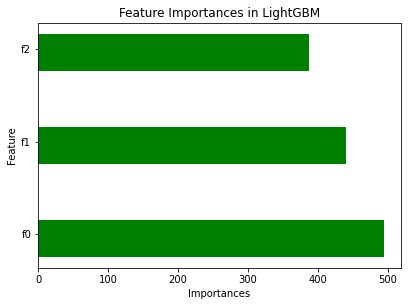

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LightGBM model dataset 1
y = lgbm1.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))

ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_1.columns, minor=False)
plt.title('Feature Importances in LightGBM')
plt.xlabel('Importances')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

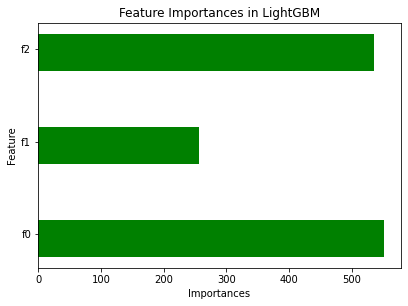

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LightGBM model dataset 2
y = lgbm2.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))

ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_2.columns, minor=False)
plt.title('Feature Importances in LightGBM')
plt.xlabel('Importances')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

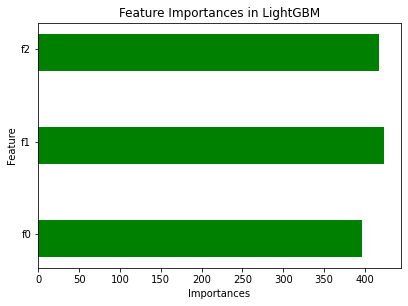

<Figure size 360x360 with 0 Axes>

In [ ]:
# check each feature's coefficient on LightGBM model dataset 3
y = lgbm3.feature_importances_
fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))

ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(x_train_3.columns, minor=False)
plt.title('Feature Importances in LightGBM')
plt.xlabel('Importances')
plt.ylabel('Feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Evaluation by RMSE

In [ ]:
# rmse of Location 1
mse_lgbm_1 = mean_squared_error(y_valid_1, predict_lgbm_1)
rmse_lgbm_1 = mse_lgbm_1**0.5
rmse_lgbm_1

37.119465531423465

In [ ]:
# rmse of Location 2
mse_lgbm_2 = mean_squared_error(y_valid_2, predict_lgbm_2)
rmse_lgbm_2 = mse_lgbm_2**0.5
rmse_lgbm_2

1.3962260313350665

In [ ]:
# rmse of Location 3
mse_lgbm_3 = mean_squared_error(y_valid_3, predict_lgbm_3)
rmse_lgbm_3 = mse_lgbm_3**0.5
rmse_lgbm_3

44.68734550886719

### Predictions vs targets for Location 1

In [ ]:
# save dataframe target of dataset valid Location 1
delta_lgbm_1 = target_valid_1

# add column for predictions
delta_lgbm_1['predict'] = pd.Series(predict_lgbm_1)
delta_lgbm_1.head()

,index,product,predict
0,42083,145.825972,132.073954
1,71825,134.020212,86.908232
2,99535,88.905826,50.336323
3,47879,19.508226,83.251903
4,36734,108.713468,109.043717


In [ ]:
# set original index as the index
delta_lgbm_1 = delta_lgbm_1.set_index('index')
delta_lgbm_1

,product,predict
index,,
42083,145.825972,132.073954
71825,134.020212,86.908232
99535,88.905826,50.336323
47879,19.508226,83.251903
36734,108.713468,109.043717
...,...,...
56405,80.100250,92.054323
50954,47.345664,50.434867
99121,176.382705,146.338633


In [ ]:
# add column for discrepancy predictions to actual
delta_lgbm_1['var'] = delta_lgbm_1['product']-delta_lgbm_1['predict']
delta_lgbm_1.head()

,product,predict,var
index,,,
42083,145.825972,132.073954,13.752018
71825,134.020212,86.908232,47.111980
99535,88.905826,50.336323,38.569503
47879,19.508226,83.251903,-63.743677
36734,108.713468,109.043717,-0.330249


In [ ]:
# load statistical description
delta_lgbm_1.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,92.850624,92.523463,0.327160
std,44.409353,24.153294,37.118766
min,0.000000,28.715521,-110.583189
25%,56.798166,73.999610,-26.834516
50%,92.372796,92.437900,0.064470
75%,129.011163,110.423371,27.572480
max,185.355615,158.314740,118.208773


### Predictions vs targets for Location 2

In [ ]:
# save dataframe target of dataset valid Location 2
delta_lgbm_2 = target_valid_2

# add column for predictions
delta_lgbm_2['predict'] = pd.Series(predict_lgbm_2)
delta_lgbm_2.head()

,index,product,predict
0,42083,57.085625,56.695103
1,71825,80.859783,80.989428
2,99535,53.906522,53.953506
3,47879,107.813044,107.950359
4,36734,53.906522,53.904458


In [ ]:
# set original index as the index
delta_lgbm_2 = delta_lgbm_2.set_index('index')
delta_lgbm_2

,product,predict
index,,
42083,57.085625,56.695103
71825,80.859783,80.989428
99535,53.906522,53.953506
47879,107.813044,107.950359
36734,53.906522,53.904458
...,...,...
56405,30.132364,29.338433
50954,110.992147,110.858905
99121,3.179103,3.205948


In [ ]:
# add column for discrepancy predictions to actual
delta_lgbm_2['var'] = delta_lgbm_2['product']-delta_lgbm_2['predict']
delta_lgbm_2.head()

,product,predict,var
index,,,
42083,57.085625,56.695103,0.390521
71825,80.859783,80.989428,-0.129645
99535,53.906522,53.953506,-0.046984
47879,107.813044,107.950359,-0.137315
36734,53.906522,53.904458,0.002064


In [ ]:
# load statistical description
delta_lgbm_2.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,69.273712,69.292032,-0.018320
std,45.819818,45.788898,1.396134
min,0.000000,-0.088906,-25.871401
25%,30.132364,28.993106,-0.058827
50%,80.859783,80.805014,0.002521
75%,107.813044,109.245839,0.062039
max,137.945408,137.998343,25.307569


### Predictions vs targets for Location 3

In [ ]:
# save dataframe target of dataset valid Location 3
delta_lgbm_3 = target_valid_3

# add column for predictions
delta_lgbm_3['predict'] = pd.Series(predict_lgbm_3)
delta_lgbm_3.head()

,index,product,predict
0,42083,147.451978,94.843209
1,71825,128.711794,93.133319
2,99535,106.628185,92.843130
3,47879,128.787131,95.266120
4,36734,159.328488,94.701188


In [ ]:
# set original index as the index
delta_lgbm_3 = delta_lgbm_3.set_index('index')
delta_lgbm_3

,product,predict
index,,
42083,147.451978,94.843209
71825,128.711794,93.133319
99535,106.628185,92.843130
47879,128.787131,95.266120
36734,159.328488,94.701188
...,...,...
56405,114.783531,93.365611
50954,48.814291,95.681158
99121,152.196856,94.750139


In [ ]:
# add column for discrepancy predictions to actual
delta_lgbm_3['var'] = delta_lgbm_3['product']-delta_lgbm_3['predict']
delta_lgbm_3.head()

,product,predict,var
index,,,
42083,147.451978,94.843209,52.608769
71825,128.711794,93.133319,35.578475
99535,106.628185,92.843130,13.785055
47879,128.787131,95.266120,33.521011
36734,159.328488,94.701188,64.627300


In [ ]:
# load statistical description
delta_lgbm_3.describe()

,product,predict,var
count,25000.000000,25000.000000,25000.000000
mean,94.873488,95.041236,-0.167748
std,44.674172,1.975183,44.687924
min,0.009204,64.627575,-100.153502
25%,59.427249,94.242484,-35.556332
50%,94.682593,95.083714,-0.375551
75%,130.407800,95.955144,35.390449
max,190.010982,116.949060,113.480783


### Interim Conclusions

Means and RMSE of predicted volume of oil reserve are:

- Location 1: 92 and 37, respectively

- Location 2: 81 and 1.4, respectively

- Location 3: 95 and 45, respectively

Although the targets and predictions of dataset of each Location 1 and Location 3 have similar means and medians, their standard deviations differ significantly. And the fact that the minimum value in their discrepancies is significantly negative, it shows that the model which are trained with features f0, f1, and f2 is not a well performing model for each Location 1 and Location 3.

In addition to that, R2 score for model of Location 1 is as low as 0.3. And it is even negative for model of Location 3, that means the model does not predict better than the mean of the target values.

On the contrary, targets and predictions of dataset of Location 2 have similar means and medians, standard deviations, even quartiles. And R2 score is high as 0.9. It shows that the model which are trained with features f0, f1, and f2 performs well for Location 2.



Having built three models using three different algorithms, it seems that none of the three models can perform well enough for dataset of Location 1 and Location 3.

This is shown by R2 score that is low, even negative.

Also, metric of RMSE is high, even as high as the standard deviation of the dataset itself.

When taking a look at the data distribution on the target and each of the features: f0, f1, f2 in the dataset of Location 1 and Location 3, it seems that none of the features has a close similarity of distribution to the target's distribution. Hence it makes sense, that none of the features is a good predictor to the target.

Somehow whatever model that is tried for dataset of Location 1 and Location 3 (XGBoost, LGBM, dan Linear Regression) is not able to generalize the effect of features f0, f1, f2 to the target, which in this case is the volume of oil reserves. This is probably caused by none of features fo, f1, and f2 is relevant factor to the volume of oil reserve in Location 1 and Location 3.

In contrast, all three models perform well for dataset of Location 2. Metrics R2 score and RMSE shows a very high performing model.

When taking a look at its data distribution, its target's distribution is similar to its feature f2's distribution. And when reviewing the coefficient of the models for dataset Location 2, the feature f2 is the main predictor for the target. It makes sense that the volume of oil reserves in Location 2 is almost perfectly determined by feature f2.

## Profitability Analysis

In this step, known key business metrics, like budgeted cost, revenue per oil well, and loss margin, also profitability analysis will be made.

In [ ]:
# number of wells to develop is 200
n_wells = 200

# budgeted cost to develop 200 wells is 100,000,000
budget_cost = 100000000

# cost to develop one well
cost_well = budget_cost/n_wells

# revenue per product unit is 4,500
revenue_product = 4500

# loss margin that the company is willing to bear is 2.5%
loss_threshold = 0.025

# break even point (BEP) at volume
bep_volume = cost_well/revenue_product

print('BEP at volume: ',bep_volume)

# loss threshold at volume
loss_threshold_volume = bep_volume*(1-loss_threshold)
print('Loss threshold at volume: ',loss_threshold_volume)

BEP at volume:  111.11111111111111
Loss threshold at volume:  108.33333333333333


### Minimum volume per well

In [ ]:
# mean of volume per well of Location 1
df_1['product'].mean()

92.50000000000001

In [ ]:
# mean of volume per well of Location 2
df_2['product'].mean()

68.82500000000002

In [ ]:
# mean of volume per well of Location 3
df_3['product'].mean()

95.00000000000004

To reach a break even point for the company's project, a well must have at least 111.11 barrel of oil reserves. 

And for loss threshold, 108.3 barrel.

The means of volume per well in each three locations are not higher than the break even point, nor even than the 2.5 loss threshold.

### Wells with largest oil volume

This time, the actual total volume of 200 highest producting wells as predicted by the built model is searched.

In [ ]:
# save 200 highest predicted volumen wells in Location 1
largest_1 = delta_xgb_1.sort_values(by='predict', ascending=False).head(200)
largest_1

,product,predict,var
index,,,
18944,71.006124,173.149918,-102.143794
77209,143.148329,170.214218,-27.065889
20381,128.380515,170.078796,-41.698282
95537,158.128561,166.483215,-8.354654
14042,132.951877,165.902191,-32.950314
...,...,...,...
47549,173.233393,148.556244,24.677149
76091,124.740825,148.490250,-23.749425
20866,175.289015,148.439194,26.849822


In [ ]:
# save 200 highest predicted volumen wells in Location 2
largest_2 = delta_xgb_2.sort_values(by='predict', ascending=False).head(200)
largest_2

,product,predict,var
index,,,
88770,137.945408,138.142944,-0.197537
90498,137.945408,137.981125,-0.035717
48244,137.945408,137.981125,-0.035717
66262,137.945408,137.981125,-0.035717
27039,137.945408,137.981125,-0.035717
...,...,...,...
47316,137.945408,137.947556,-0.002148
45238,137.945408,137.947556,-0.002148
21295,137.945408,137.947556,-0.002148


In [ ]:
# save 200 highest predicted volumen wells in Location 3
largest_3 = delta_xgb_3.sort_values(by='predict', ascending=False).head(200)
largest_3

,product,predict,var
index,,,
97168,35.774306,160.532028,-124.757722
27475,58.056297,158.090820,-100.034524
82586,114.888847,157.067001,-42.178154
55565,45.914488,156.517792,-110.603304
95074,51.814448,154.624741,-102.810292
...,...,...,...
36923,136.337798,118.147690,18.190108
48926,29.098429,118.120872,-89.022443
30696,35.527409,118.108276,-82.580867


In [ ]:
sum_locations = pd.DataFrame([[largest_1['product'].sum(), largest_2['product'].sum(), 
                              largest_3['product'].sum()]], columns=['location_1','location_2','location_3'])
sum_locations

,location_1,location_2,location_3
0,28967.504986,27589.081548,17795.455764


It appears that Location 1 has the highest total volume for 200 top predicted wells. While models for Location 1 are barely able to predict in an accurate manner, this might mean that the actual top 200 volume wells of this location may produce even larger volume than 28,967 thousand barrel.

Hence it is right to recommend Location 1 as the location to develop.

In [ ]:
# Calculate profit on Location 1
profit = revenue_product * largest_1['product'].sum() - budget_cost
print('{:.2f}'.format(profit))


30353772.44


In [ ]:
# Calculate profit on Location 2
profit = revenue_product * largest_2['product'].sum() - budget_cost
print('{:.2f}'.format(profit))


24150866.97


In [ ]:
# Calculate profit on Location 3
profit = revenue_product * largest_3['product'].sum() - budget_cost
print('{:.2f}'.format(profit))


-19920449.06


The total profit for 200 wells developed in Location 1 is USD 30,353,772.

## Risk and Return

In this step, the profitability and risk potential analysis will be made. Using bootstrapping technique, 1,000 sample sets will be created to find distribution of profit amount. Confidence interval of 95% will also be discovered. Aside from that, potential of risk of each location will be calculated. One location will be recommended for development based on those three metrics.

In [ ]:
# bootstrapping size
bootstrap_size = 1000

# sample size
sample_size = 500

In [ ]:
# create function to calculate profit
def cal_profit(target, prediction):
    predict_sorted = prediction.sort_values(ascending=False)
    target_selected = target[predict_sorted.index][:n_wells]
    total_volume = target_selected.sum()
    revenue = total_volume * revenue_product
    profit = revenue - budget_cost
    return profit

In [ ]:
# test function for consistent result
cal_profit(delta_xgb_1['product'], delta_xgb_1['predict'])

30353772.43782918

In [ ]:
# create function for bootstrap
def profit_bootsrapped(df, target, predict):
    # bootstrap to get distribution of means
    state = np.random.RandomState(123)
    # Simpan nilai mean ke variabel values
    profit = []
    for i in range(bootstrap_size):
        subsample = df.sample(sample_size, replace=True, random_state=state)
        profit.append(cal_profit(subsample[target], subsample[predict]))

    profit = pd.Series(profit)  
    profit_mean = int(profit.mean())
    confidence_interval = (int(profit.quantile(0.025)), int(profit.quantile(0.975)))
    loss_risk = (profit < 0).mean()*100
    return profit_mean, confidence_interval, loss_risk

In [ ]:
profit_mean_1, confidence_interval_1, loss_risk_1 = profit_bootsrapped(delta_xgb_1,'product', 'predict')
profit_mean_1, confidence_interval_1, loss_risk_1

(5074498, (-803391, 10436876), 4.3)

In [ ]:
profit_mean_2, confidence_interval_2, loss_risk_2 = profit_bootsrapped(delta_xgb_2,'product', 'predict')
profit_mean_2, confidence_interval_2, loss_risk_2

(5388610, (1050097, 9635649), 0.5)

In [ ]:
profit_mean_3, confidence_interval_3, loss_risk_3 = profit_bootsrapped(delta_xgb_3,'product', 'predict')
profit_mean_3, confidence_interval_3, loss_risk_3

(-15102278, (-21248570, -8962280), 100.0)

In [ ]:
pd.DataFrame([[profit_mean_1, confidence_interval_1, loss_risk_1],
             [profit_mean_2, confidence_interval_2, loss_risk_2],
             [profit_mean_3, confidence_interval_3, loss_risk_3]],index=['Location 1','Location 2','Location 3'],columns=['mean', 'confidence_interval', 'loss_risk'])

,mean,confidence_interval,loss_risk
Location 1,5074498,"(-803391, 10436876)",4.3
Location 2,5388610,"(1050097, 9635649)",0.5
Location 3,-15102278,"(-21248570, -8962280)",100.0


### Interim Conclusions

Using the best performing model of algorithm XGBoost and bootstrapping tehcnique, profitability analysis of each Location is made. The most profitable location is Location 2: USD 5,388,610, with confidence interval 95%: USD 1,050,097 - USD 9,635,649, and risk potential 0.5%. All metrics meet what is required by the company.

# Final Conclusions

This project is started by data pre-processing and exploratory data analysis. No missing values, and explicit duplicates found in the datasets. 

Three models with three different algorithms: XGBoostRegressor, LinearRegression, and LightGBMRegressor, are built.

All three algorithms perform well for dataset of Location 2. Yet none work satisfactorily for datasets of Location 1 and Location 3. This is probably related to the three given predictors being weekly relevant to the volume of oil reserved. 

Without bootstrapping, Location 1 appears as the most promising contributor to profitability.

However with bootstrapping technique, it is discovered that the extremely high figure does not fall in the confidence interval of 95% of the distribution of mean of the samples.

Finally, it is found that Location 2 is solid and more likely to contribute the highest profit, with mean distribution of confidence interval of 95% : USD 1,050,097 - USD 9,635,649, and loss potential as low as 0.5%.